In [4]:
!pip install google_play_scraper
!pip install app_store_scraper
!pip install WordCloud

from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
clashroyale_playstore_new = reviews_all(
        "com.supercell.clashroyale",
        sleep_milliseconds=0,
        lang='en',
        country='us',
        sort=Sort.NEWEST,
    )

clashroyale_playstore = reviews_all(
        "com.supercell.clashroyale",
        sleep_milliseconds=0,
        lang='en',
        country='us',
        sort=Sort.MOST_RELEVANT,
    )

In [6]:
clashroyale_appstore_new = AppStore(
    country="us",
    app_name="clash-royale",
    app_id="1053012308"
)

clashroyale_appstore_new.review(
    how_many=1000,
    sleep=0
)

In [9]:
g_df = pd.DataFrame(np.array(clashroyale_playstore),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion','userName'},inplace = True)
g_df2.rename(columns= {'score': 'rating', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)

g_df3 = pd.DataFrame(np.array(clashroyale_playstore_new),columns=['review'])
g_df4 = g_df3.join(pd.DataFrame(g_df3.pop('review').tolist()))
g_df4.drop(columns={'userImage', 'reviewCreatedVersion','userName'},inplace = True)
g_df4.rename(columns= {'score': 'rating', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)

df_final_cr = pd.merge(g_df2, g_df4, how='outer').drop_duplicates()

df_final_cr.to_csv('reviews_clashroyale.csv',index = False, escapechar='\\')

In [ ]:
g_df5 = pd.DataFrame(np.array(clashroyale_appstore_new),columns=['review'])

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# g_df = pd.DataFrame(np.array(squadbuster_playstore),columns=['review'])
# g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
# g_df2.drop(columns={'userImage', 'reviewCreatedVersion','userName'},inplace = True)
# g_df2.rename(columns= {'score': 'rating', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)


# g_df3 = pd.DataFrame(np.array(squadbuster_appstore.reviews),columns=['review'])
# g_df4 = g_df3.join(pd.DataFrame(g_df3.pop('review').tolist()))

# g_df2.to_csv('reviews_squadbusters_playstore.csv',index = False)
# g_df4.to_csv('reviews_squadbusters_appstore.csv',index = False)
# g_df2.to_csv('/content/drive/MyDrive/reviews_squadbusters_playstore.csv.csv', index=False, escapechar='\\')
# g_df4.to_csv('/content/drive/MyDrive/reviews_squadbusters_appstore.csv', index=False, escapechar='\\')


CLASH ROYALE

8/30/2020 Clan Wars 2.0

10/27/2021 Champions and Level 14

5/26/2023 Level 15

In [ ]:
# df_final_cr.drop(columns= ['developer_response','developer_response_date'],inplace = True)

In [15]:
import os
os.getcwd()

'/content/drive/MyDrive'

In [13]:
os.chdir('drive/MyDrive')

In [18]:
df_cr = pd.read_csv('/content/drive/MyDrive/reviews_clashroyale.csv')

In [23]:
df_cr.shape

(700222, 8)

In [21]:
df_cr['developer_response'].isna().sum()

700222

In [24]:
df_cr['developer_response_date'].isna().sum()

700222

In [25]:
df_cr.drop(columns= ['developer_response','developer_response_date'],inplace = True)

In [27]:
df_cr.dtypes

,0
review_id,object
review_description,object
rating,int64
thumbs_up,int64
review_date,object
appVersion,object


In [28]:
df_cr['review_date'] = pd.to_datetime(df_cr['review_date'])

In [35]:
df_cr['review_description'].isna().sum()

20

In [37]:
df_cr[df_cr['review_description'].isna()].groupby('rating')['thumbs_up'].count()

,thumbs_up
rating,
1,3
3,1
4,3
5,13


In [39]:
df_cr[df_cr['review_description'].isna()]['thumbs_up'].value_counts()

,count
thumbs_up,
0,20


In [41]:
df_cr['rating'].value_counts()/df_cr['rating'].count() * 100

,count
rating,
5,57.843370
1,22.494295
4,10.187055
3,5.570376
2,3.904904


<Axes: xlabel='rating'>

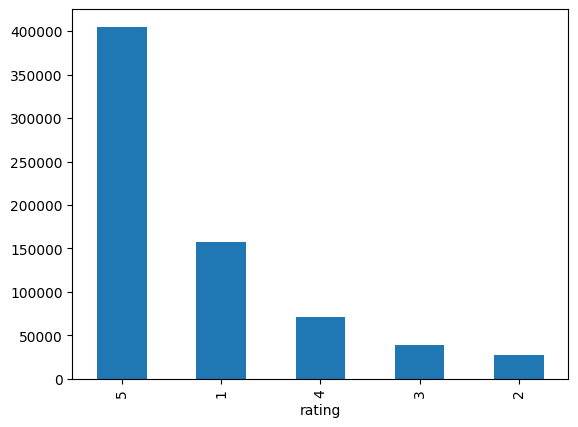

In [42]:
df_cr['rating'].value_counts().plot(kind = 'bar')

In [43]:
df_cr[(df_cr['review_date']>='2018-4-25')& (df_cr['review_date']<='2018-4-29')][['review_description','rating']]

,review_description,rating


In [50]:
df_cr.groupby(df_cr['review_date'].dt.month)['rating'].mean().round(3).reset_index().rename(columns = {'review_date':'Month','rating':'Rating'})

,Month,Rating
0,1,3.653
1,2,3.645
2,3,3.818
3,4,3.478
4,5,3.559
5,6,3.619
6,7,3.641
7,8,3.977
8,9,3.894
9,10,3.937


In [51]:
df_cr.sort_values(by = 'review_date', ascending = True, inplace = True)

In [52]:
df_cr['running_mean'] = df_cr['rating'].expanding().mean()

In [55]:
# df_cr['appVersion'].isna().sum()

151299